In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import mpld3
import numpy as np
import pandas as pd
import os, sys
import warnings

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [10]:
n_features = 20

nonsense_column_names = [''.join(np.random.choice(['ab', 'cd', 'ef', '  ', 'gh'],
                                                  size=np.random.randint(1, 12)))
                                  for _ in range(n_features)]
nonsense_column_names

['ghghcdcdabefcdcdabefgh',
 'efabefef  efefcdab',
 'efab      efcdab  ab',
 'abghefghef',
 'cdefcd  gh  ghcdefghcd',
 'gh  cdefefghgh',
 '  cdcdefefcdcd',
 '  ab  gh  ',
 'abab',
 'gh    efefgh',
 'ab  abghabefgh  ghab',
 'cdcd',
 'abefefab  ',
 '  ',
 'cdcdcdcdcd',
 'cdcdabef',
 'abefghghefabcdcd',
 'ghghcdghghabefefef',
 'cdefef',
 'abghghgh  efgh']

In [11]:
X, y = make_classification(n_features=n_features)
X = pd.DataFrame(data=X, columns=nonsense_column_names)

In [12]:
clf = RandomForestClassifier(min_samples_leaf=5)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
rf_importances = pd.DataFrame({'name':X.columns,
                               'importance':clf.feature_importances_
                              }).sort_values(by='importance', 
                                              ascending=False).reset_index(drop=True)

In [14]:
rf_importances

,importance,name
0,0.243071,cdcdcdcdcd
1,0.236586,cdcd
2,0.138182,abefghghefabcdcd
3,0.073489,cdefcd gh ghcdefghcd
4,0.049622,cdcdabef
5,0.044306,abghghgh efgh
6,0.043028,ghghcdghghabefefef
7,0.022931,efabefef efefcdab
8,0.021757,ab abghabefgh ghab
9,0.021582,ab gh


In [15]:
sns.set_context("poster", font_scale=1.3)

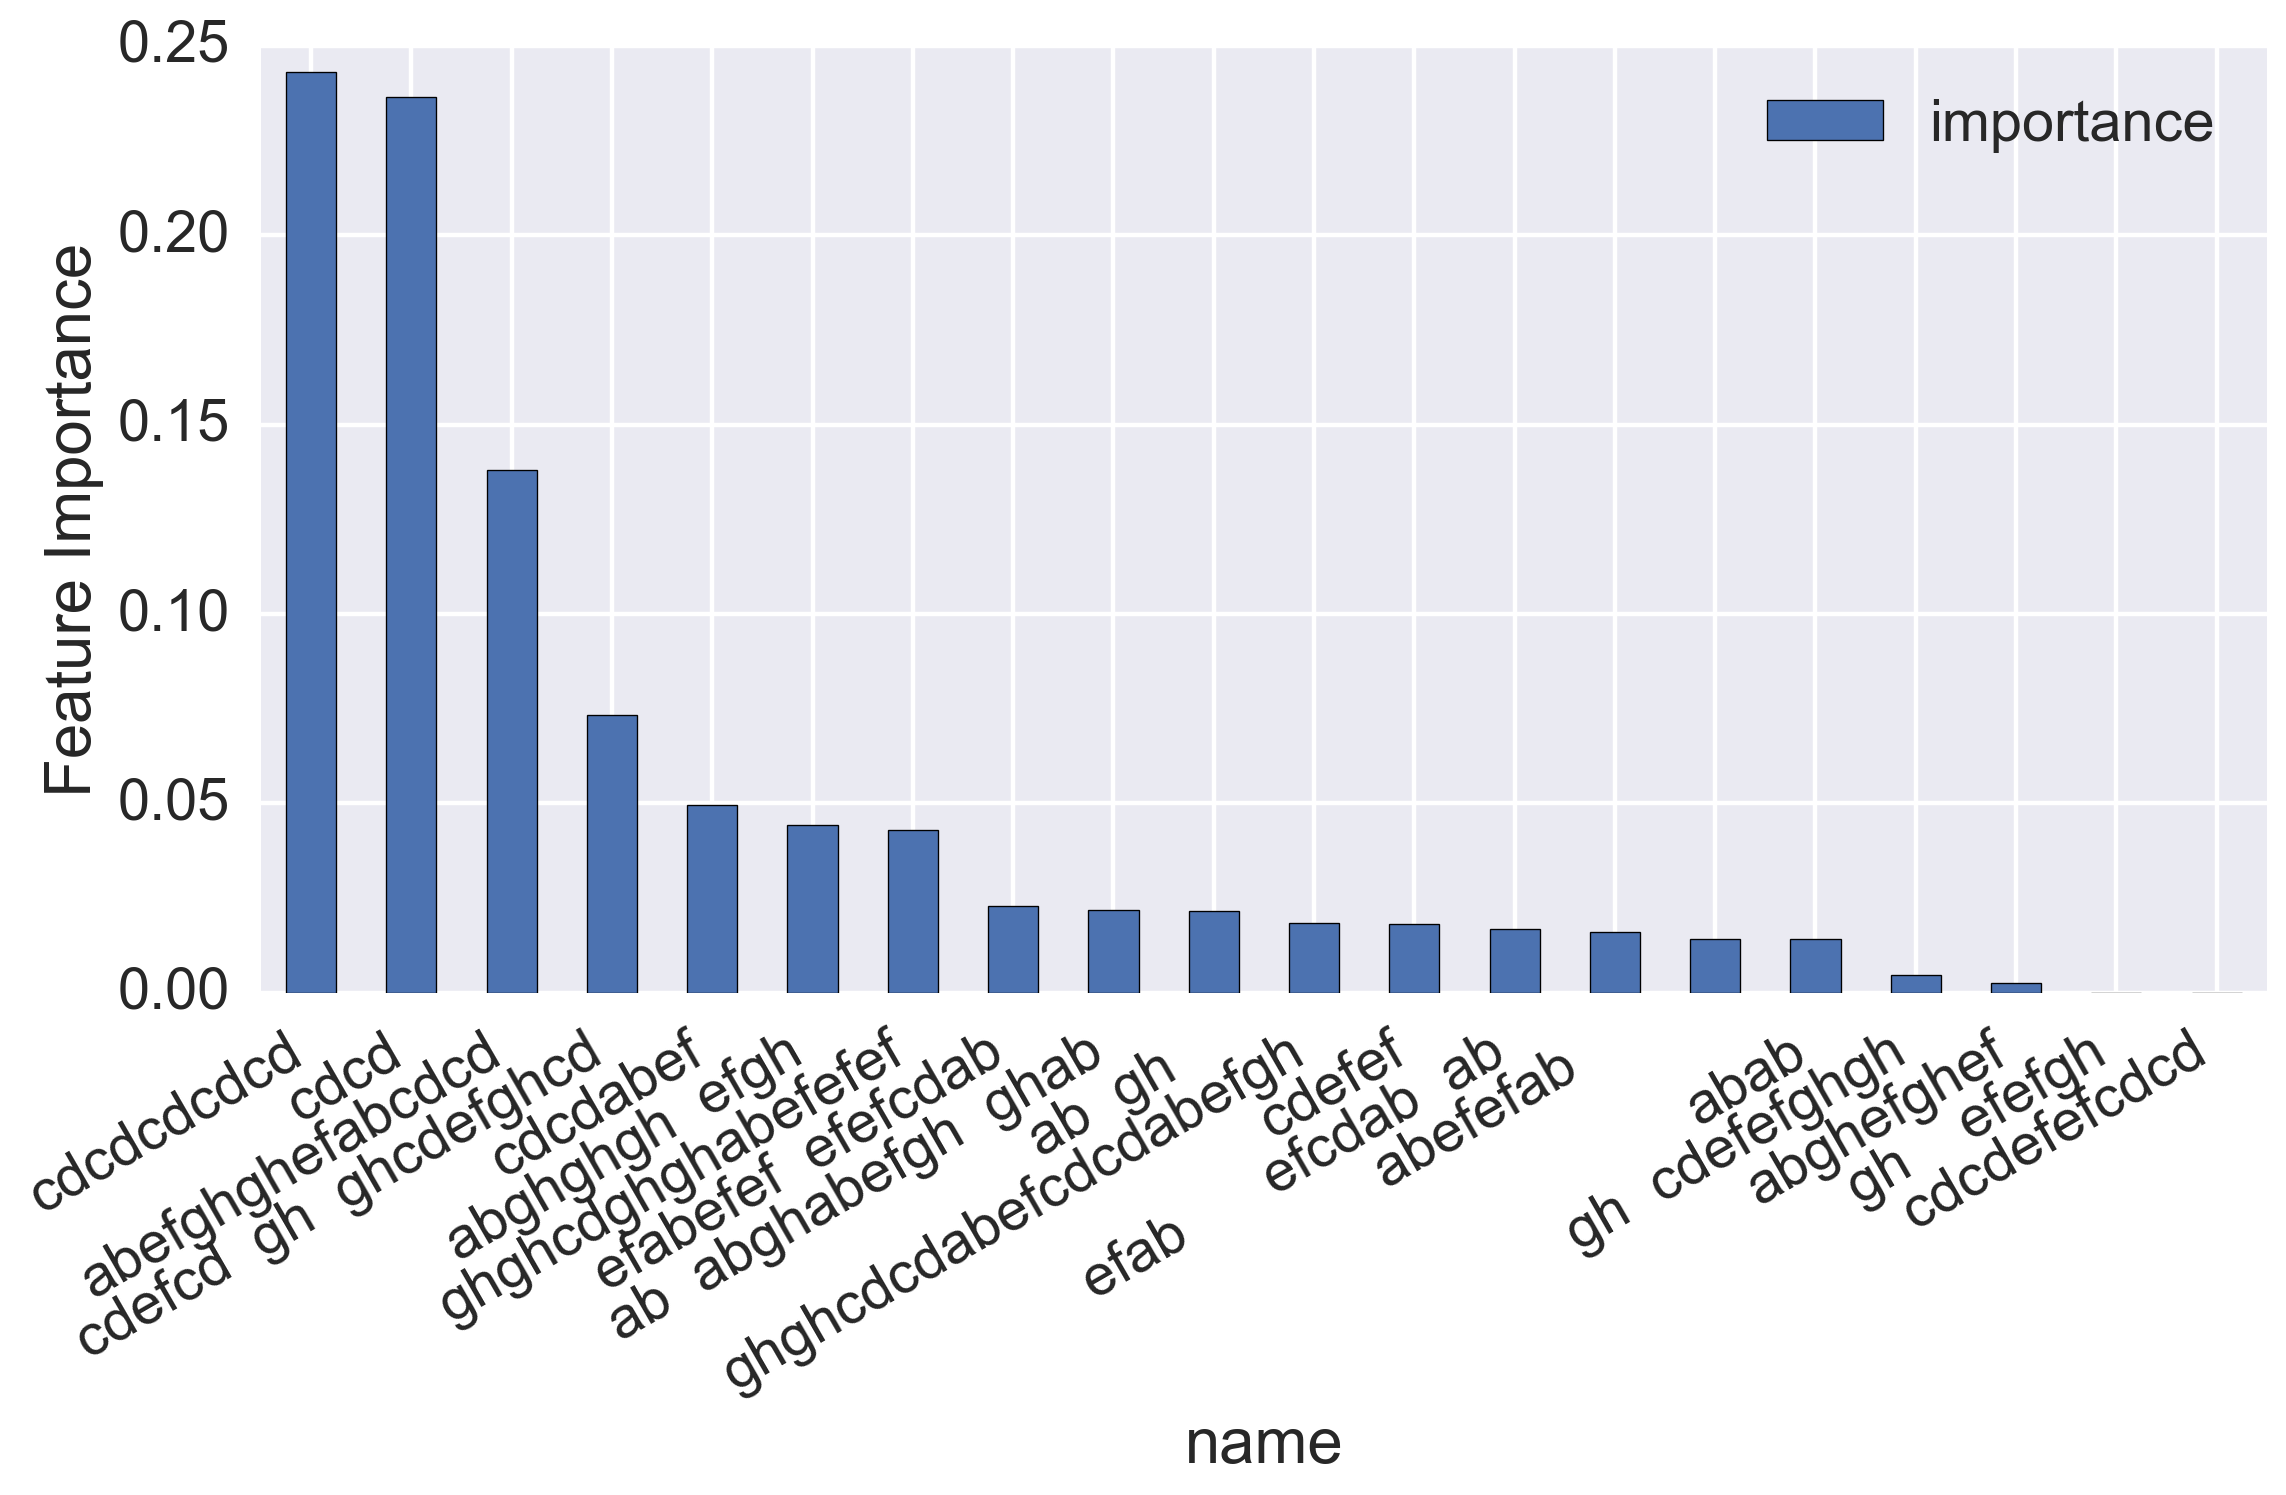

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
rf_importances.set_index('name').plot.bar(ax=ax)
ax.set_ylabel("Feature Importance")
fig.autofmt_xdate()
fig.tight_layout()